# Imports


In [304]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [305]:
import numpy as np
from scripts.gaussian_streaming_clusterer import CluStream
from scripts.gaussian_dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [306]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [307]:
file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [308]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 73442
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 11 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.4042990703804015), np.float64(6.346383368253682), np.float64(-1.541314698593015), np.float64(-0.9055797042395867)]
prod0 - center: [np.float64(3.4485229347631075), np.float64(6.3685227226512335), np.float64(-1.5497302375061766), np.float64(-0.8824478182244077)]
hellinger distance: 0.0

ref0 - center: [np.float64(3.4042990703804015), np.float64(6.346383368253682), np.float64(-1.541314698593015), np.float64(-0.9055797042395867)]
prod1 - center: [np.float64(6.043859221449065), np.float64(6.186256599689288), np.float64(2.3472505982347998), np.float64(0.6313702206844007)]
hellinger distance: 0.9854628816975863

ref1 - center: [np.float64(5.99696263917709), np.float64(6.200135345752439), np.float64(2.3926793457188773), np.float64(0.6666791670204794)]
prod0 - center: [np.float64(3.4485229347631075), np.float64(6.3685227226512335)

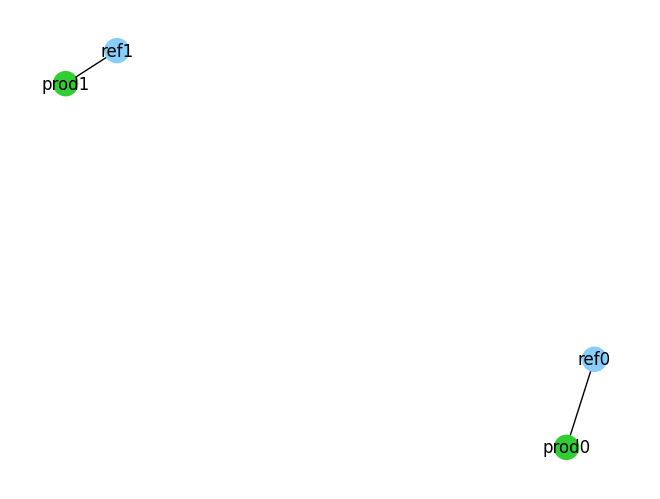

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 134 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.4485229347631075), np.float64(6.3685227226512335), np.float64(-1.5497302375061766), np.float64(-0.8824478182244077)]
prod0 - center: [np.float64(6.442570528136081), np.float64(6.22882278255687), np.float64(1.9836361910727993), np.float64(0.583788496383791)]
hellinger distance: 0.9715558985133493

ref0 - center: [np.float64(3.4485229347631075), np.float64(6.3685227226512335), np.float64(-1.5497302375061766), np.float64(-0.8824478182244077)]
prod1 - center: [np.float64(3.591387081398368), np.float64(6.561289508326643), np.float64(-1.6315312133255813), np.float64(-0.8129377491368943)]
hellinger distance: 0.0

ref1 - center: [np.float64(6.043859221449065), np.float64(6

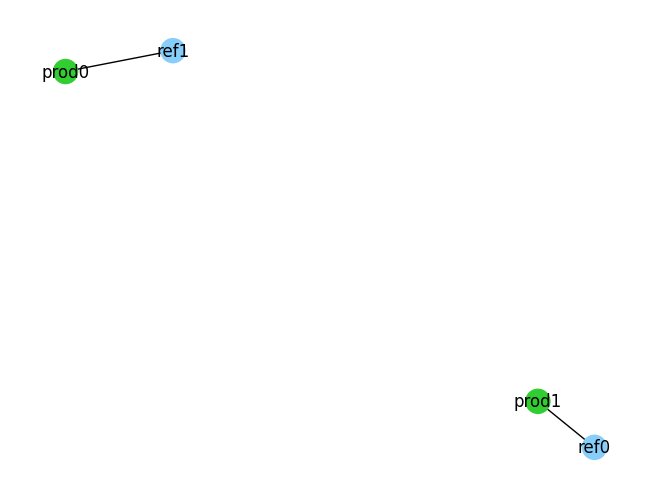

(id: 1) SURVIVED as (id: 1) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 215 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.591387081398368), np.float64(6.561289508326643), np.float64(-1.6315312133255813), np.float64(-0.8129377491368943)]
prod0 - center: [np.float64(3.7241496247058317), np.float64(6.491211303227101), np.float64(-1.6229237958999099), np.float64(-0.8686420170094853)]
hellinger distance: 0.0

ref0 - center: [np.float64(3.591387081398368), np.float64(6.561289508326643), np.float64(-1.6315312133255813), np.float64(-0.8129377491368943)]
prod1 - center: [np.float64(6.681973994661859), np.float64(6.25388926679588), np.float64(1.6441956985028807), np.float64(0.43413514478881804)]
hellinger distance: 0.9850855501076734

ref1 - center: [np.float64(6.442570528136081), np.float64(6.

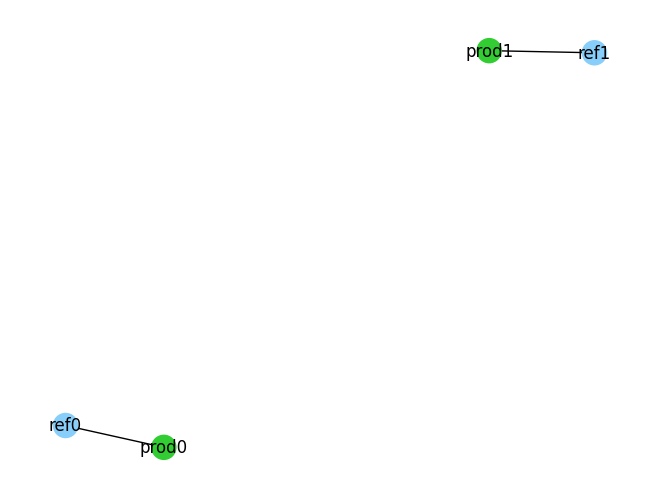

(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 374 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.7241496247058317), np.float64(6.491211303227101), np.float64(-1.6229237958999099), np.float64(-0.8686420170094853)]
prod0 - center: [np.float64(7.734741805601717), np.float64(6.289662906932142), np.float64(0.18866823980227776), np.float64(-0.0495284408920021)]
hellinger distance: 0.9836211409216248

ref0 - center: [np.float64(3.7241496247058317), np.float64(6.491211303227101), np.float64(-1.6229237958999099), np.float64(-0.8686420170094853)]
prod1 - center: [np.float64(3.1361030685910802), np.float64(6.367805514075022), np.float64(-1.5856708300763283), np.float64(-0.8859143928029827)]
hellinger distance: 0.0

ref0 - center: [np.float64(3.7241496247058317), np.float

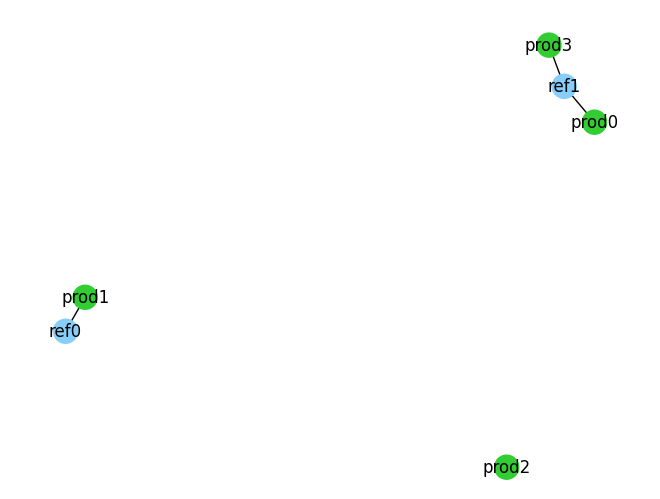

(id: 1) SURVIVED as (id: 1) (score: 0.6242258655428992)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(!) (id: 2) APPEARED --- (score: 0.6197142240529997)
(!) (id: 1) SURVIVED as (id: 3) but a SPLITTING is needed (score: 0.5795799909089272)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 473 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.1361030685910802), np.float64(6.367805514075022), np.float64(-1.5856708300763283), np.float64(-0.8859143928029827)]
prod0 - center: [np.float64(5.916568275385417), np.float64(6.235270249777562), np.float64(2.5620177876047285), np.float64(0.8330946134918366)]
hellinger distance: 0.9990557384041625

ref0 - center: [np.float64(3.1361030685910802), np.float64(6.367805514075022), np.float64(-1.5856708300763283), np.float64(-0.8859143928029827)]
prod1 - center: [np.float64(3.239384550485212), np.float64(

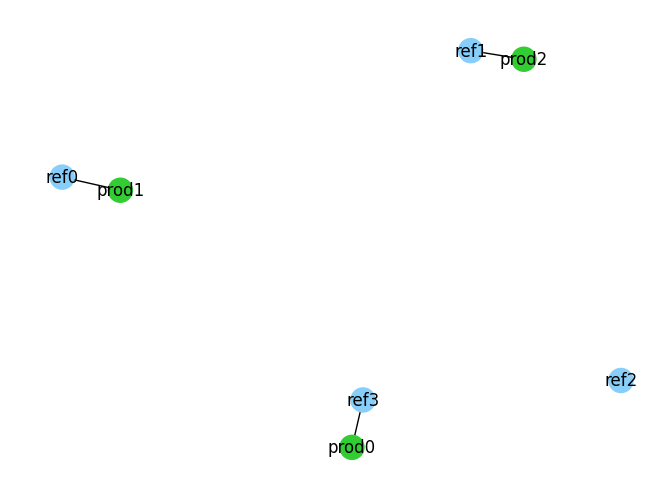

(!) (id: 2) DISAPPEARED (score: 0.6152730287190888)
(id: 3) SURVIVED as (id: 3) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 0.6419921301838056)

Final macroclusters:
(id: 0)
(id: 1)
(id: 3)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(3.239384550485212), np.float64(6.332533054041588), np.float64(-1.537627034411273), np.float64(-0.9840889013157905)]
prod0 - center: [np.float64(8.352620541142779), np.float64(6.010328897657866), np.float64(-1.7074355887724597), np.float64(-0.6340565116090727)]
hellinger distance: 0.9749844770362649

ref0 - center: [np.float64(3.239384550485212), np.float64(6.332533054041588), np.float64(-1.537627034411273), np.float64(-0.9840889013157905)]
prod1 - center: [np.float64(3.174531717568926), np.float64(6.3569502163703175), np.float64(-1.5219823692255257), np.float64(-0.9473657090514496)]
hellinger distanc

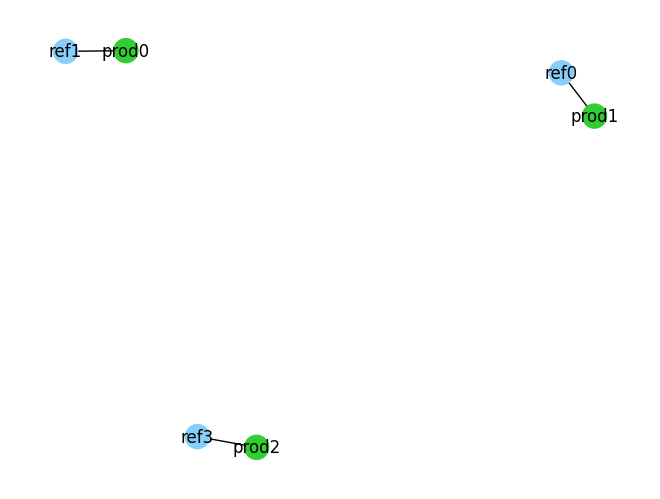

(id: 1) SURVIVED as (id: 1) (score: 1.0)
(id: 0) SURVIVED as (id: 0) (score: 1.0)
(id: 3) SURVIVED as (id: 3) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 1)
(id: 3)

-----------------------------------------------------------------------------------



In [309]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, print_statistics=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


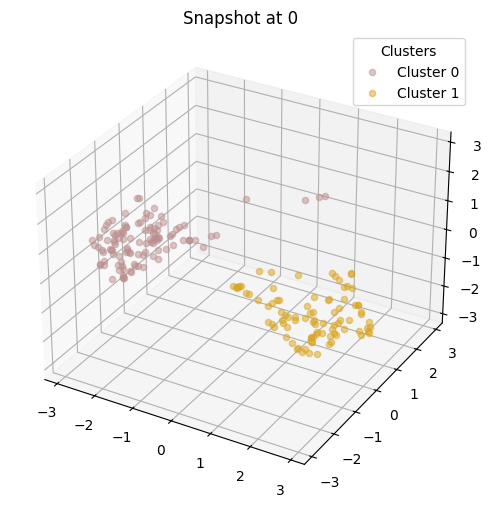

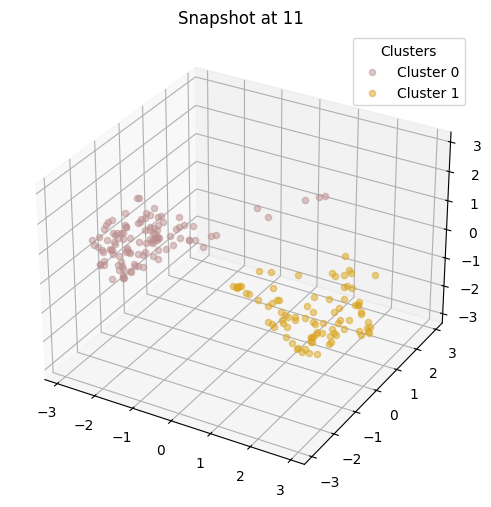

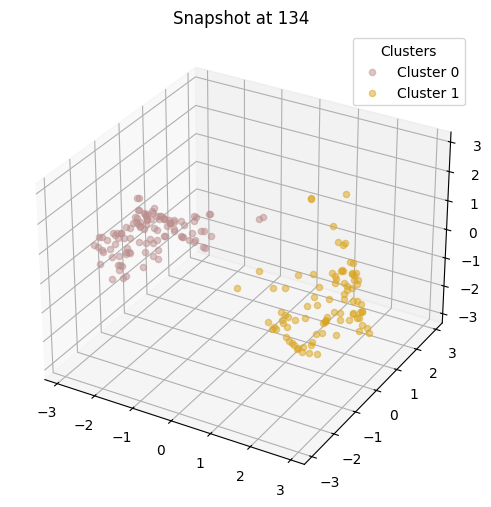

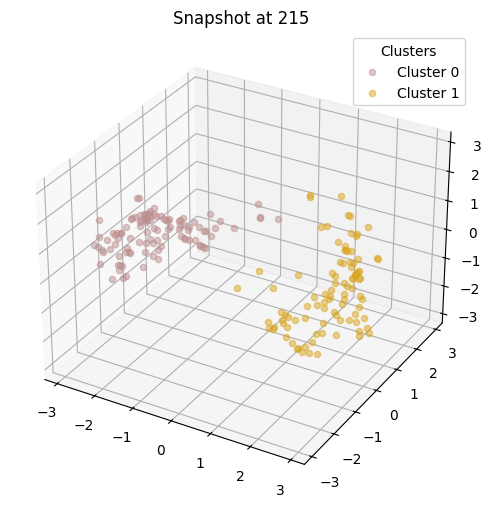

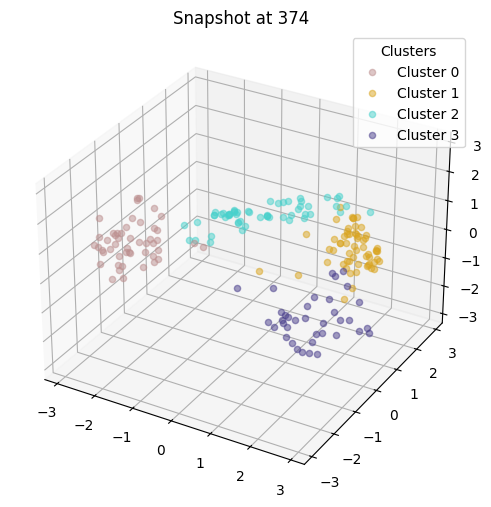

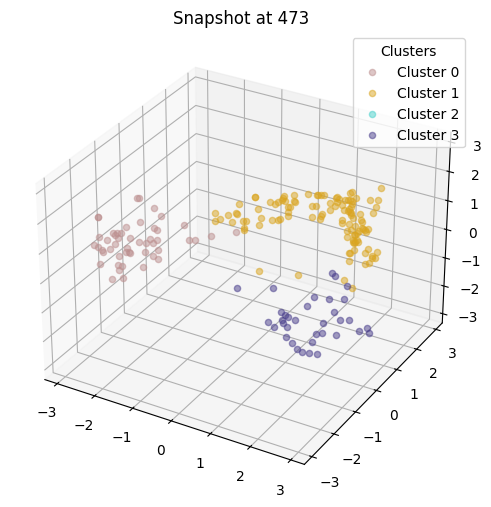

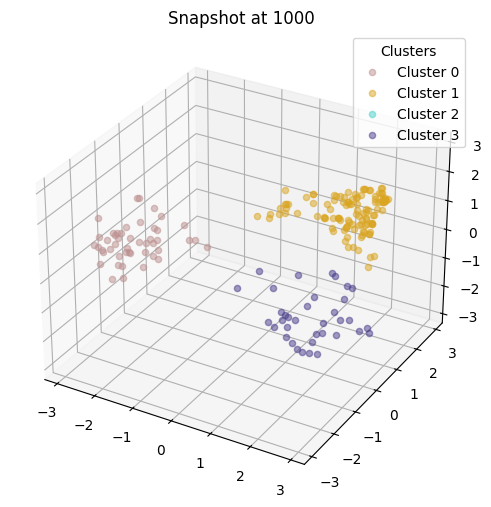

Directory './plots/73442' and its contents removed successfully.


In [310]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)